In [1]:
VN30_2019 = ["VNM",'TCB','VIC','MSN','HPG','VPB','VHM','VJC',
             'MWG','MBB','SAB','VCB','HDB','FPT','STB','NVL',
             'EIB','VRE','PNJ','GAS','SSI','CTG','GMD','CTD',
             'ROS','REE','SBT','CII','DPM','DHG']

In [2]:
from vnstock3 import Vnstock
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
# Fetch historical data for VN30
vnindex_data = Vnstock().stock(symbol='VN30')
vnindex_data = vnindex_data.quote.history(start='2017-08-24', end='2018-12-31')
vnindex_data['Return'] = vnindex_data['close'].pct_change()

beta_values = {}

2024-09-02 21:47:58,758 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [4]:
market_data =  Vnstock().stock(symbol='VNINDEX')
market_data = market_data.quote.history(start='2017-08-24', end='2018-12-31')
market_data['Return'] = market_data['close'].pct_change()
market_data

2024-09-02 21:48:02,518 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,time,open,high,low,close,volume,Return
0,2017-08-24 07:00:00,766.48,771.65,764.64,769.77,208905050,NaN
1,2017-08-25 07:00:00,769.07,771.63,768.57,771.63,218265430,0.002416
2,2017-08-28 07:00:00,771.81,777.26,770.51,777.26,240572610,0.007296
3,2017-08-29 07:00:00,773.91,777.11,773.87,774.03,255981300,-0.004156
4,2017-08-30 07:00:00,774.31,778.65,773.85,778.65,193496470,0.005969
...,...,...,...,...,...,...,...
334,2018-12-24 07:00:00,910.86,916.41,908.56,908.56,109246400,-0.004056
335,2018-12-25 07:00:00,893.71,897.94,882.17,897.94,168379500,-0.011689
336,2018-12-26 07:00:00,896.63,899.49,890.86,891.75,104065930,-0.006894
337,2018-12-27 07:00:00,904.80,906.63,900.81,900.81,112522140,0.010160


In [5]:
for symbol in VN30_2019:
    # Fetch historical data for each stock in VN30
    stock_data = Vnstock().stock(symbol=symbol)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2018-12-31')
    stock_data['Return'] = stock_data['close'].pct_change()

    # Merge the dataframes on date
    merged_data = pd.merge(stock_data[['time', 'Return']], market_data[['time', 'Return']], on='time', suffixes=('_STOCK', '_VNINDEX'))
    merged_data.dropna(inplace=True)  # Drop rows with NaN values

    # Perform linear regression to calculate beta
    if not merged_data.empty:
        beta, alpha, r_value, p_value, std_err = stats.linregress(merged_data['Return_VNINDEX'], merged_data['Return_STOCK'])
        beta_values[symbol] = beta

2024-09-02 21:48:02,967 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:03,204 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:03,394 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:03,617 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:03,858 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:04,079 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:04,350 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:06,103 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [6]:
beta_values

{'VNM': np.float64(0.610230096869529),
 'TCB': np.float64(1.2383289481229838),
 'VIC': np.float64(0.8586465329308605),
 'MSN': np.float64(1.074803389688698),
 'HPG': np.float64(1.1278833871853802),
 'VPB': np.float64(1.502885854511323),
 'VHM': np.float64(0.6281763310390196),
 'VJC': np.float64(1.0442982160008139),
 'MWG': np.float64(0.9951794400257197),
 'MBB': np.float64(1.3445721451930852),
 'SAB': np.float64(0.5520013489582093),
 'VCB': np.float64(1.4575867308918693),
 'HDB': np.float64(1.13850113779743),
 'FPT': np.float64(0.9467897634812881),
 'STB': np.float64(1.2726884314976663),
 'NVL': np.float64(0.41794565590535787),
 'EIB': np.float64(0.5173311285701814),
 'VRE': np.float64(1.1643209411912623),
 'PNJ': np.float64(1.139348140110916),
 'GAS': np.float64(1.6398697309897323),
 'SSI': np.float64(1.5223795559787563),
 'CTG': np.float64(1.7272084413963833),
 'GMD': np.float64(0.8516330831729966),
 'CTD': np.float64(0.7270896010204387),
 'ROS': np.float64(0.8613834631481249),
 'REE

In [7]:
def calculate_return(df):
    if df.empty:
        return 0
    first_price = df['close'].iloc[0]
    final_price = df['close'].iloc[-1] 
    stock_return = ((final_price - first_price)/first_price) * 100
    return stock_return

In [8]:
stock_return = {}

for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2018-12-31')
    return_rate = calculate_return(stock_data)
    stock_return[stock] = return_rate


2024-09-02 21:48:12,855 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


2024-09-02 21:48:13,248 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:13,459 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:13,701 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:13,949 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:14,212 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:14,449 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:14,677 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:48:14,891 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [9]:
stock_return

{'VNM': np.float64(0.7575757575757504),
 'TCB': np.float64(-24.29003021148037),
 'VIC': np.float64(164.80150046889653),
 'MSN': np.float64(68.48468565287482),
 'HPG': np.float64(28.590078328981715),
 'VPB': np.float64(-10.918774966711045),
 'VHM': np.float64(-16.96706028589186),
 'VJC': np.float64(66.16845928202261),
 'MWG': np.float64(11.582381729200652),
 'MBB': np.float64(8.926080892608084),
 'SAB': np.float64(8.069516204790984),
 'VCB': np.float64(49.393414211438476),
 'HDB': np.float64(-20.698466780238498),
 'FPT': np.float64(6.86141304347826),
 'STB': np.float64(1.7021276595744619),
 'NVL': np.float64(34.33621662279052),
 'EIB': np.float64(17.535545023696688),
 'VRE': np.float64(-15.707620528771377),
 'PNJ': np.float64(37.2594752186589),
 'GAS': np.float64(51.22135482246285),
 'SSI': np.float64(17.39552964042761),
 'CTG': np.float64(5.921052631578952),
 'GMD': np.float64(-15.357000398883134),
 'CTD': np.float64(-20.92889908256882),
 'ROS': np.float64(-51.87165775401069),
 'REE': 

In [10]:
# stock_return_series = pd.Series(stock_return)
# market_return = stock_return_series.mean()/100
# market_return
market_return = (market_data['close'].iloc[-1] - market_data['close'].iloc[0])/100
market_return

np.float64(1.2276999999999998)

In [11]:
risk_free = [0.0598, 0.0471]
risk_free = pd.Series(risk_free)
R_f = risk_free.mean()
R_f

np.float64(0.05345)

In [37]:
df = pd.DataFrame(list(beta_values.items()), columns=['Stock', 'Beta'])

# Calculate the expected return using the CAPM formula
df['Expected Return'] = (R_f + df['Beta'] * (market_return - R_f)) * 100
df

,Stock,Beta,Expected Return
0,VNM,0.610230,77.001269
1,TCB,1.238329,150.755777
2,VIC,0.858647,106.171569
3,MSN,1.074803,131.553788
4,HPG,1.127883,137.786707
5,VPB,1.502886,181.821371
6,VHM,0.628176,79.108606
7,VJC,1.044298,127.971718
8,MWG,0.995179,122.203946
9,MBB,1.344572,163.231384


In [38]:
top5_return = df.sort_values(by='Expected Return', ascending=False).head(5)
least_return = df.sort_values(by='Expected Return').head(5)
return_sorted = df.sort_values(by='Expected Return').reset_index(drop=True)
median_index = len(return_sorted) // 2
if len(return_sorted) % 2 == 0:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]
else:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]

near1_stock = df[(df['Beta'] < 1.1) & (df['Beta'] > 0.9)]
# print(median_stocks)
print(near1_stock)
# print(top5_return)
# print(least_return)

   Stock      Beta  Expected Return
3    MSN  1.074803       131.553788
7    VJC  1.044298       127.971718
8    MWG  0.995179       122.203946
13   FPT  0.946790       116.521788
25   REE  0.984230       120.918256


In [39]:
top5_beta = df.sort_values(by='Beta', ascending=False).head(5)
least_beta = df.sort_values(by='Beta').head(5)
beta_sorted = df.sort_values(by='Beta').reset_index(drop=True)
median_index = len(beta_sorted) // 2
if len(beta_sorted) % 2 == 0:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]
else:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]

near1_stock = df[(df['Beta'] < 1.1) & (df['Beta'] > 0.9)]
# print(median_stocks)
print(near1_stock)

   Stock      Beta  Expected Return
3    MSN  1.074803       131.553788
7    VJC  1.044298       127.971718
8    MWG  0.995179       122.203946
13   FPT  0.946790       116.521788
25   REE  0.984230       120.918256


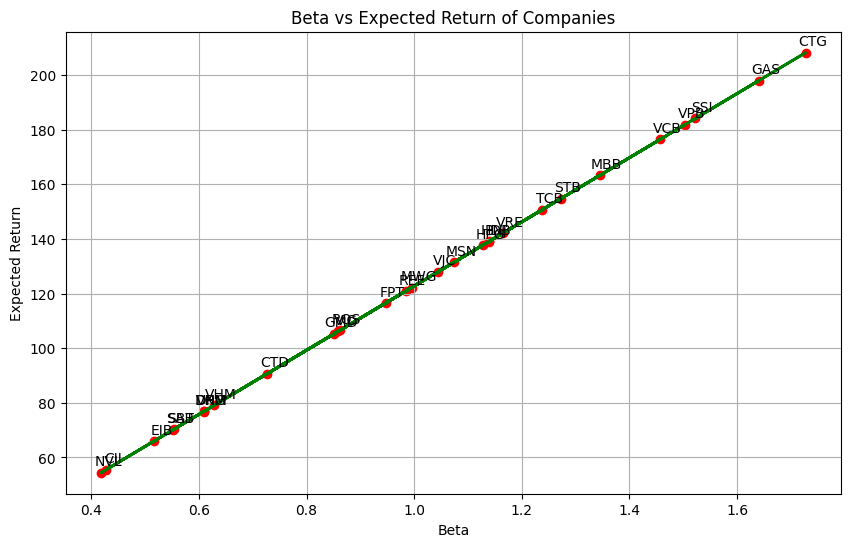

In [40]:
import matplotlib.pyplot as plt

# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], df['Expected Return'], color='red')

# Line plot to connect all the points
plt.plot(df['Beta'], df['Expected Return'], color='green', linestyle='-', linewidth=2)

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], df['Expected Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Expected Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

In [36]:
real_return = {}
for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2018-12-31')
    return_rate = calculate_return(stock_data)
    real_return[stock] = return_rate

2024-09-02 21:50:20,403 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


2024-09-02 21:50:20,697 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:50:20,887 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:50:21,094 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:50:21,374 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:50:21,597 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:50:21,925 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:50:22,291 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-09-02 21:50:22,522 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [41]:
real_stock_return = pd.Series(real_return)
real_stock_return = pd.DataFrame(real_stock_return, columns=['Return'])
real_stock_return

,Return
VNM,0.757576
TCB,-24.290030
VIC,164.801500
MSN,68.484686
HPG,28.590078
VPB,-10.918775
VHM,-16.967060
VJC,66.168459
MWG,11.582382
MBB,8.926081


In [42]:
real_stock_return.sort_values(by='Return', ascending=False).head(10)

,Return
VIC,164.801500
MSN,68.484686
VJC,66.168459
GAS,51.221355
VCB,49.393414
PNJ,37.259475
NVL,34.336217
HPG,28.590078
EIB,17.535545
SSI,17.395530


C:\Users\Admin\AppData\Local\Temp\ipykernel_8968\2039225582.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')


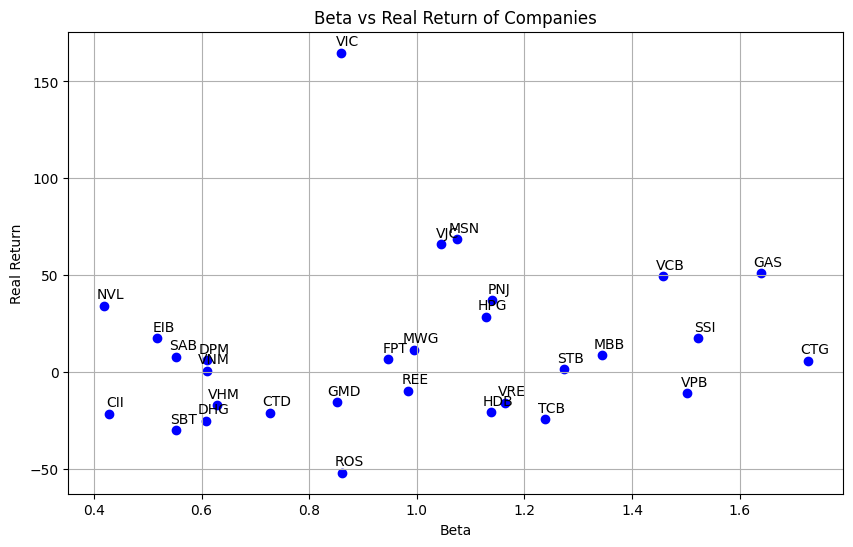

In [43]:
# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], real_stock_return['Return'], color='blue')

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Real Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Real Return')
plt.grid(True)
plt.show()

In [44]:
real_stock_return['Return']

VNM      0.757576
TCB    -24.290030
VIC    164.801500
MSN     68.484686
HPG     28.590078
VPB    -10.918775
VHM    -16.967060
VJC     66.168459
MWG     11.582382
MBB      8.926081
SAB      8.069516
VCB     49.393414
HDB    -20.698467
FPT      6.861413
STB      1.702128
NVL     34.336217
EIB     17.535545
VRE    -15.707621
PNJ     37.259475
GAS     51.221355
SSI     17.395530
CTG      5.921053
GMD    -15.357000
CTD    -20.928899
ROS    -51.871658
REE     -9.619342
SBT    -29.755011
CII    -21.491228
DPM      6.214227
DHG    -25.074770
Name: Return, dtype: float64

In [45]:
real_stock_return

,Return
VNM,0.757576
TCB,-24.290030
VIC,164.801500
MSN,68.484686
HPG,28.590078
VPB,-10.918775
VHM,-16.967060
VJC,66.168459
MWG,11.582382
MBB,8.926081


In [46]:
new_df = df.set_index('Stock')[['Expected Return', 'Beta']]
new_df

,Expected Return,Beta
Stock,,
VNM,77.001269,0.610230
TCB,150.755777,1.238329
VIC,106.171569,0.858647
MSN,131.553788,1.074803
HPG,137.786707,1.127883
VPB,181.821371,1.502886
VHM,79.108606,0.628176
VJC,127.971718,1.044298
MWG,122.203946,0.995179


In [47]:
concatenated_df = pd.concat([real_stock_return, new_df], axis=1)
concatenated_df

,Return,Expected Return,Beta
VNM,0.757576,77.001269,0.610230
TCB,-24.290030,150.755777,1.238329
VIC,164.801500,106.171569,0.858647
MSN,68.484686,131.553788,1.074803
HPG,28.590078,137.786707,1.127883
VPB,-10.918775,181.821371,1.502886
VHM,-16.967060,79.108606,0.628176
VJC,66.168459,127.971718,1.044298
MWG,11.582382,122.203946,0.995179
MBB,8.926081,163.231384,1.344572


In [48]:
concatenated_df['Deviation'] = concatenated_df['Return'] - concatenated_df['Expected Return']
variance_deviation = concatenated_df['Deviation'].var()
std_deviation = concatenated_df['Deviation'].std()


In [49]:
print(variance_deviation)
print(std_deviation)

3006.8892652570344
54.83510978613095


In [50]:
concatenated_df['beta_minus'] = 1 - concatenated_df['Beta']

In [51]:
concatenated_df.sort_values(by='beta_minus')

,Return,Expected Return,Beta,Deviation,beta_minus
CTG,5.921053,208.162451,1.727208,-202.241399,-0.727208
GAS,51.221355,197.906703,1.639870,-146.685348,-0.639870
SSI,17.395530,184.110419,1.522380,-166.714890,-0.522380
VPB,-10.918775,181.821371,1.502886,-192.740146,-0.502886
VCB,49.393414,176.502122,1.457587,-127.108708,-0.457587
MBB,8.926081,163.231384,1.344572,-154.305303,-0.344572
STB,1.702128,154.790439,1.272688,-153.088311,-0.272688
TCB,-24.290030,150.755777,1.238329,-175.045807,-0.238329
VRE,-15.707621,142.065387,1.164321,-157.773007,-0.164321
PNJ,37.259475,139.132955,1.139348,-101.873480,-0.139348


In [52]:
concatenated_df.sort_values(by='Deviation')

,Return,Expected Return,Beta,Deviation,beta_minus
CTG,5.921053,208.162451,1.727208,-202.241399,-0.727208
VPB,-10.918775,181.821371,1.502886,-192.740146,-0.502886
TCB,-24.290030,150.755777,1.238329,-175.045807,-0.238329
SSI,17.395530,184.110419,1.522380,-166.714890,-0.522380
HDB,-20.698467,139.033496,1.138501,-159.731963,-0.138501
ROS,-51.871658,106.492953,0.861383,-158.364611,0.138617
VRE,-15.707621,142.065387,1.164321,-157.773007,-0.164321
MBB,8.926081,163.231384,1.344572,-154.305303,-0.344572
STB,1.702128,154.790439,1.272688,-153.088311,-0.272688
GAS,51.221355,197.906703,1.639870,-146.685348,-0.639870


C:\Users\Admin\AppData\Local\Temp\ipykernel_8968\1958334047.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center', color='green')


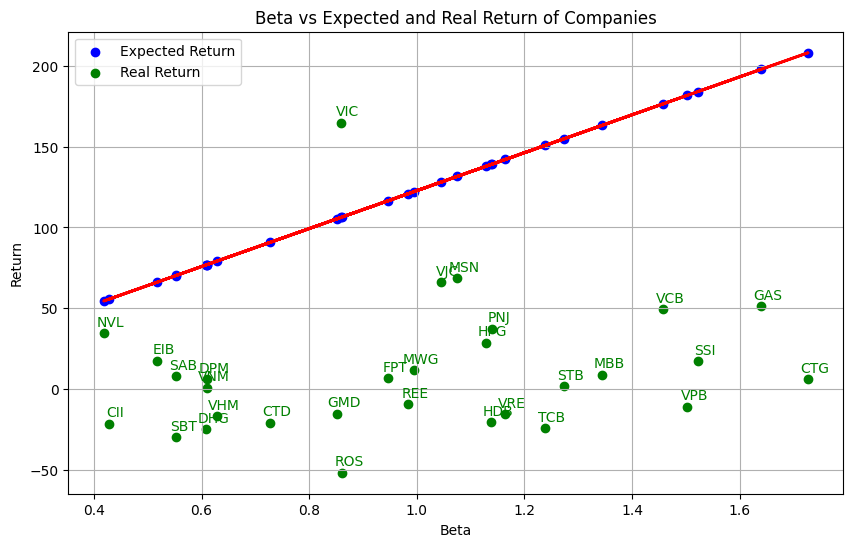

In [29]:
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' and 'real_stock_return' are already defined
plt.figure(figsize=(10, 6))

# Scatter plot for Expected Return
plt.scatter(df['Beta'], df['Expected Return'], color='blue', label='Expected Return')
plt.plot(df['Beta'], df['Expected Return'], color='red', linestyle='-', linewidth=2)

# Scatter plot for Real Return
plt.scatter(df['Beta'], real_stock_return['Return'], color='green', label='Real Return')

# Annotating each point with the corresponding stock name for Expected Return
# for i, txt in enumerate(df['Stock']):
#     plt.annotate(txt, (df['Beta'][i], df['Expected Return'][i]), textcoords="offset points", xytext=(5,5), ha='center', color='blue')

# Annotating each point with the corresponding stock name for Real Return
for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center', color='green')

# Adding title and labels
plt.title('Beta vs Expected and Real Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Return')
plt.grid(True)
plt.legend()  # Adding legend to differentiate between the two plots

# Show plot
plt.show()